---
bibliography:
  - bibliography.bib
---

# Mathematical Models for Time Series

## Mathematical Concept of Time Series [^math-concept-time]

Aside to exploratory data analysis, i.e. summary statistics and plots, the primary objective of time series analysis is to develop mathematical models that provide plausible descriptions for sample data. In order to provide a statistical setting for describing the characteristics of data that seemingly fluctuate in a random fashion over time, we assume a time series can be considered as the realization of random variables that are indexed over time.

:::{prf:definition} Time series and discrete stochastic processes
Let $T$ be a set of equidistant time points $T = {t_1, t_2, \ldots}$.

1. A *discrete stochastic process* is a set of random variables ${X_1, X_2, \ldots}$. Each single random variable $X_i$ has a univariate cumulative distribution function $F_i$ and can be observed at time $t_i$.
2. A *time series* ${x_1, x_2, \ldots}$ is a realization of a discrete stochastic process ${X_1, X_2, \ldots}$. In other words, the value $x_i$ is a realization of the random variable $X_i$ measured at time $t_i$.
:::

:::{attention}
It is important to distinguish between a time series, i.e. a concrete observation of values, and a discrete stochastic process which is a theoretical construct to model the underlying mechanism that generates the values.
:::

[^math-concept-time]: [@birbaumerPredictiveModelingLecture2025, p. 356]

### Discrete Stochastic Processes

#### Random Walk [^example-13.1.1]

Assume, that a person starts walking from the coordinate center with constant speed in $x$-direction. At each step, however, the person decides *at random* either to walk $1$m to the left or to the right. This is the simplest instance of a *random walk*. The probabilistic model for this random walk would be

1. Choose $n$ independent Bernoulli random variables $D_1,\dots, D_n$ that take on the values $1$ and $-1$ with equal probability, i.e. $p=0.5$.
1. Define the random variables $X_i = D_1+\dots+D_i$ for each $1\leq i\leq n$. Then $\{X_1, X_2,\dots\}$ is a discrete stochastic process modeling the random walk.

The following `Python`-code computes a particular instance of this process, i.e. a time series $\{x_1,x_2,\dots\}$. Each time this code is re-run, a new time series will display. The function `np.cumsum()` computes the cumulated sum of a given vector.

[^example-13.1.1]: [@birbaumerPredictiveModelingLecture2025, Example 13.1.1]

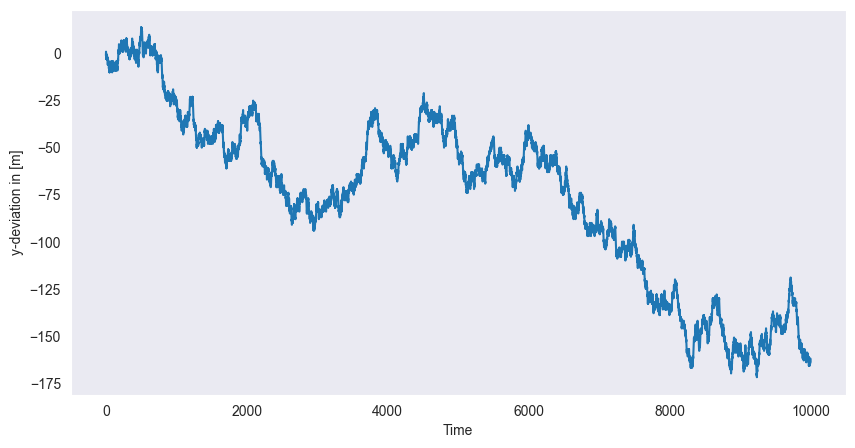

In [1]:
import matplotlib.pyplot as plt
import numpy as np

nsamp = 10000
# Random samples d and cumulative sum x
d = np.random.choice(a=[-1,1], size=nsamp, replace=True)

x = np.cumsum(d)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x)
ax.grid()
plt.xlabel("Time")
plt.ylabel("y-deviation in [m]")

plt.show()

From the definition of the process it is clear that the following recursive definition is equivalent
$$
X_i = X_{i-1} + D_i,\quad X_0 = 0.
$$
If in each step a fixed constant $\delta$ is added to the series, i.e.
$$
Y_i = \delta + Y_{i-1} + D_i,\quad Y_0 = 0.
$$
then we obtain a *random walk* with *drift*. In the figure, we see the observed time series of such a process. The random walk with drift models are used to model trends in time series data.

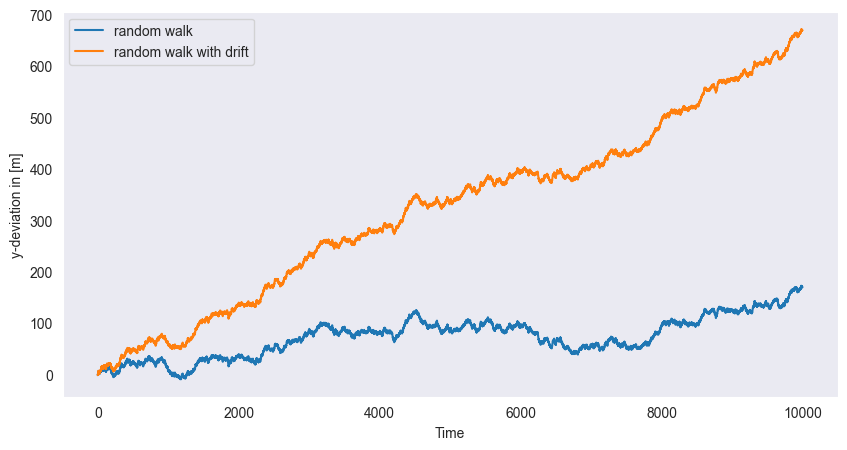

In [2]:
# Set random seed
np.random.seed(0)
# Random samples d and cumulative sum x
d = np.random.choice(a=[-1,1], size=nsamp, replace=True)
x = np.cumsum(d)
# Add drift delta
delta = 5e-2
y = np.linspace(0, nsamp*delta, nsamp)
y += x

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, label="random walk")
ax.plot(y, label="random walk with drift")
ax.grid()
plt.xlabel("Time")
plt.ylabel("y-deviation in [m]")
plt.legend()

plt.show()

#### White Noise Process (WN) [^example-13.1.2]

A white noise process consists of independent and identically distributed ($i.i.d.$) random variables $\{W_1,W_2,\dots\}$ where each $W_i$ has mean $0$ and variance $\sigma^2$.

[^example-13.1.2]: [@birbaumerPredictiveModelingLecture2025, Example 13.1.2]

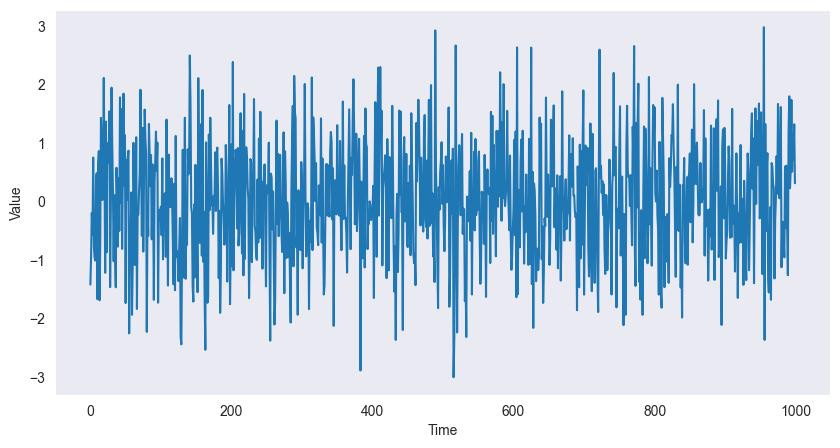

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# White noise signal
w = np.random.normal(size=1000)

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(w)
ax.grid()
plt.xlabel("Time")
plt.ylabel("Value")

plt.show()

If **in addition** the individual random variables $W_i$ are **normally distributed**, then the process is called **_Gaussian_ white noise**. These models are used to describe noise in engineering applications. The term _white_ is chosen in analogy to white light and indicates that all possible periodic oscillations are present in a time series originating from a white noise process with equal strength.

#### Moving Average Process (MA) [^example-13.1.3]

If we apply a sliding window filter to the white noise process $\{W_1,W_2,\dots\}$ in the previous example of white noise we obtain a _moving average_ process. E.g. if we choose the window length to be $3$, we obtain
$$
V_i = \frac{1}{3}(W_{i-1} + W_i + W_{i+1}).
$$
We choose $V_1 = W_1$ and $V_2 = 0.5(W_1 + W_2)$. The resulting process is smoother, i.e. the higher order oscillations are smoothed out. 
In `Python` a sliding window can be achieved using `.rolling()`, the mean can be found with `.mean()`.

[^example-13.1.3]: [@birbaumerPredictiveModelingLecture2025, Example 13.1.3]

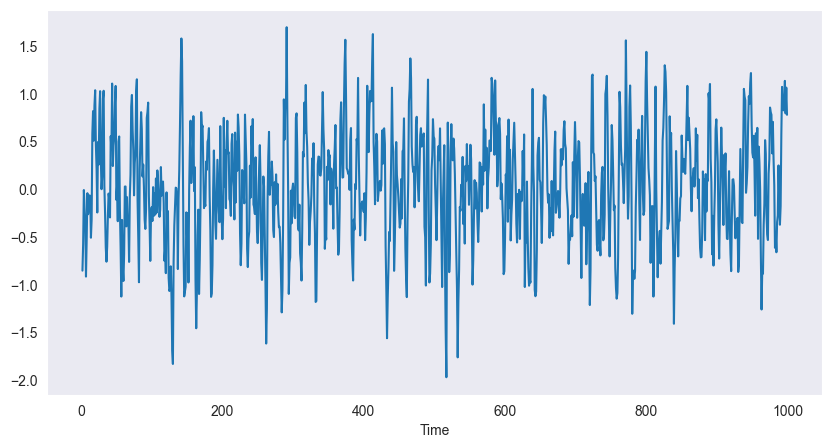

In [4]:
import pandas as pd

# Convert to DataFrame
w = pd.DataFrame(w)
# Filter with window = 3
v = w.rolling(window=3).mean()

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(v)
ax.grid()
plt.xlabel("Time")

plt.show()

#### Autoregressive Process (AR) [^example-13.1.4]

We consider again the white noise process $\{W_1,W_2,\dots\}$ and recursively compute the following sequence
$$
X_i = 1.5 X_{i-1} - 0.9 X_{i-2} + W_i.
$$
In other words, the value of the process at time instance $i$ is modelled as a linear combination of the past two values plus some random component. Therefore this process is called *autoregressive*. The definition of the initial conditions is subtle, because the process will strongly depend on these. We will for the time being ignore the issue of initial conditions.

[^example-13.1.4]: [@birbaumerPredictiveModelingLecture2025, Example 13.1.4]

/var/folders/mg/f7gk10vj1_153rz1zkvd13_00000gn/T/ipykernel_63128/1335727129.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ar[i] = 1.5 * ar[i-1] - 0.9 * ar[i-2] + w.iloc[i]


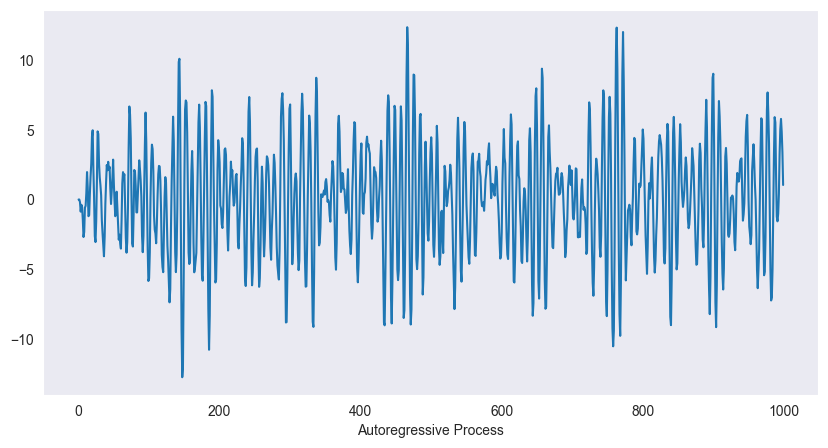

In [5]:
# Autoregressive filter:
ar = np.zeros(1000)
for i in range(2,1000):
    ar[i] = 1.5 * ar[i-1] - 0.9 * ar[i-2] + w.iloc[i]
    
# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(ar)
ax.grid()
plt.xlabel("Autoregressive Process")

plt.show()

The figure shows a realization of the autoregressive process above. The oscillatory behaviour becomes clearly visible. Another interpretation of the autoregressive process above is via differential equations. The finite difference scheme for the second order equation
$$
\ddot x + 2\delta \dot x + \omega_0^2 x = W(t) 
$$
is given by
$$
\frac{x_{i-2} - 2x_{i-1} + x_{i}}{\Delta t^2} + 2\delta\frac{x_{i} - x_{i-1}}{\Delta t} + \omega_0^2 x_{i} = W_i
$$
Here $\delta$ is the damping term and $\omega_0$ the frequency of the homogeneous equation. Setting $\Delta t = 1$, $\omega_0^2 = 0.4$ and $\delta = 0.05$ gives -- after some rearrangements -- the autoregressive process above. Hence it can be seen as a *harmonic oscillator with random input*. The wave length of the exact solution is $T = 2\pi \ \omega_0 \approx 10.0$ which matches the previous situation pretty well.

## Measures of Dependence

Aside to the individual (also called *marginal*) distributions $F_i$ of the random variables in the process, we define first and second order moments to analyse the whole process. We start with the mean sequence.

### Mean Sequence

:::{prf:definition} Mean sequence
The mean sequence ${\mu(1), \mu(2), \ldots}$ (or mean function) of a discrete stochastic process ${X_1, X_2, \ldots}$ is defined as the sequence of the means:
$$
\mu(i) = \mathrm{E}[X_i]
$$
:::


### Autocovariance and Autocorrelation [^autocovariance-autocorrelation]

Next we move to second order moments of various sorts. We only consider the covariance of the observations within a single process. Cross-covariance between two individual series is not considered in this course.

:::{prf:definition} Autocovariance and Autocorrelation
Let ${X_1, X_2, \ldots}$ be a discrete stochastic process.

1. The *autocovariance* $\gamma_X$ is defined as

$$
\gamma_X(i, j) = \operatorname{Cov}[X_i, X_j] = \mathrm{E}[(X_i - \mu(i))(X_j - \mu(j))]
$$

2. The *autocorrelation* $\rho_X$ is defined as

$$\rho_X(i, j) = \frac{\gamma_X(i, j)}{\sqrt{\gamma_X(i, i)\gamma_X(j, j)}}
$$
:::

If it is clear from the context, we will skip the subscript $X$. It is important to note that both, the autocovariance and the autocorrelation, are symmetric, i.e. $\gamma(i, j) = \gamma(j, i)$. The autocovariance measures the *linear dependence* of two points on the same process observed at different times. If a series is very smooth, the autocovariance is large, even if $i$ and $j$ are far apart. Note that if $\gamma(i, j) = 0$ this only means that $X_i$ and $X_j$ are not linearly dependent; however, they still may be dependent in some nonlinear way. For $i = j$ the autocovariance reduces to the variance of $X_i$.

The autocorrelation can be described much in the same spirit, however, it is normalized, i.e. $\rho(i, j) \in [-1, 1]$. Put differently, if there is a linear relationship between $X_i$ and $X_j$, then $\rho(X_i, X_j) = \pm 1$. To be more precise, if $X_j = \beta_0 + \beta_1 X_i$, then the autocorrelation will be $1$ if $\beta_1 > 0$ and $-1$ else. The autocorrelation hence gives a rough measure how well the series at time $i$ can be forecast by the value at time $j$.

[^autocovariance-autocorrelation]: [@birbaumerPredictiveModelingLecture2025, pg. 364]

## Stationarity [^stationarity]

As we have stated above, a time series can be seen as a *single* realization of a multivariate random variable ${X_1, X_2, \ldots}$ which we call in this special setting a stochastic process. As we already know from elementary statistics, there is no way to do sound statistical analysis on a single observation. **Hence we need a concept of regularity that allows us to infer information from a single time series: stationarity.**

### Strict stationarity

:::{prf:definition} Strict stationarity
A discrete stochastic process is called *strictly stationary* if for each finite collection ${X_{i_1}, \ldots, X_{i_n}}$ and each lag $h \in \mathbb{Z}$ the shifted collection

$$
{X_{i_1 + h}, \ldots, X_{i_n + h}}
$$

has the same distribution. Put differently:

$$
P(X_{i_1} \le c_1, \ldots, X_{i_n} \le c_n) = P(X_{i_1 + h} \le c_1, \ldots, X_{i_n + h} \le c_n)
$$

for any $c_1, \ldots, c_n$.
:::

The definition of strict stationarity amounts to say, that any selection of observations in the time series is a typical realization of the random variables in a selection of the process with the same pattern at any point in time. Loosely speaking, this means that the probabilistic character of the process does not change over time. Strict stationarity often is a too strong assumption for many applications and hard to assess from a single data set.

The definition of strict stationarity in particular implies for the special case $n = 1$, i.e. the “collection” of time instances in fact consists of one sample, that

$$P(X_i \le c) = P(X_j \le c)$$

for all $i, j$ and for all $c$. This amounts to say that the marginal distributions $F_i = F$ of the process coincide and in particular this implies that $\mu_X(i) = \mu_X(j)$ or in other words, that the mean sequence is constant.

Further, we can consider the case when $n = 2$. Then the definition of strict stationarity implies that

$$P(X_i \le c_1, X_j \le c_2) = P(X_{i+h} \le c_1, X_{j+h} \le c_2).$$

The joint distribution of each pair of time instances in the process depends only on the time difference $h$ and hence the autocovariance satisfies

$$\gamma(i, j) = \gamma(i + h, j + h).$$

These two conclusions from strict stationarity are sufficient for most applications in order to come up with reasonable statistical models. Hence they give rise to the definition of a weaker form of stationarity.

### Weak stationarity

:::{prf:definition} Weak stationarity
A discrete stochastic process $X_i$ is called *weakly stationary* if

1. the mean sequence $\mu_X(i)$ is constant and does not depend on the time index $i$ and
2. the autocovariance sequence $\gamma_X(i, j)$ depends on $i$ and $j$ only through their difference $|i - j|$
:::

From the discussion above it is clear that each strictly stationary time series is also weakly stationary. But the opposite is in general not true. It can be shown that for Gaussian processes, i.e. when all finite collections of random variables in the process have a joint normal distribution, the two notions of stationarity are equivalent.

[^stationarity]: [@birbaumerPredictiveModelingLecture2025, p. 366]

### Testing Stationary [^example-13.3.2]

We study the STL decomposition of two time series from Chapter Introduction to Time Series. We begin with the quarterly Australian electricity production. We read the data into **Python** and decompose the logarithm of the data into a trend, a seasonal component and a remainder. We just plot the remainder of the series.

[^example-13.3.2]: [@birbaumerPredictiveModelingLecture2025, Example 13.3.2]

/var/folders/mg/f7gk10vj1_153rz1zkvd13_00000gn/T/ipykernel_63128/2474646333.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dtindexE = pd.DatetimeIndex(data=pd.to_datetime(AusEl["Quarter"]),


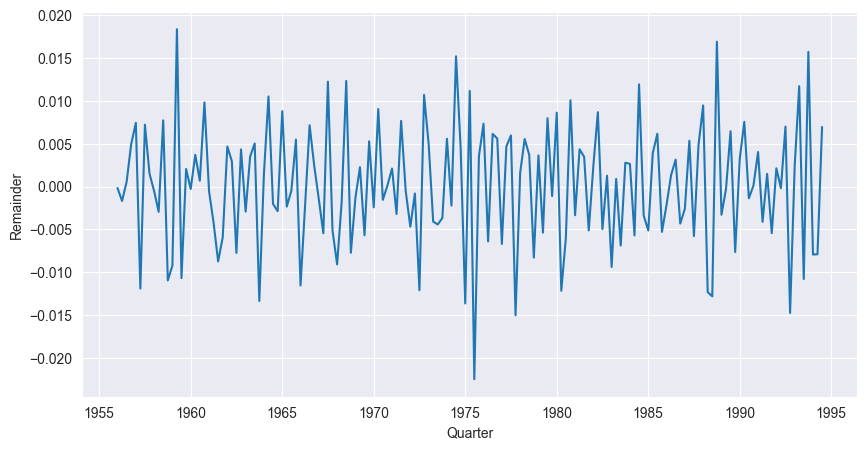

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import STL

# Load data
AusEl = pd.read_csv('data/AustralianElectricity.csv', sep =";")
# Create pandas DateTimeIndex
dtindexE = pd.DatetimeIndex(data=pd.to_datetime(AusEl["Quarter"]), 
                            freq='infer')

# Set as Index
AusEl.set_index(dtindexE, inplace=True)
AusEl.drop("Quarter", axis=1, inplace=True)

# Decomposition on log-model using STL
decomp = STL(np.log(AusEl), seasonal=15)
decomp = decomp.fit()

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(decomp.resid)
plt.xlabel("Quarter")
plt.ylabel("Remainder")

plt.show()

The series does not exhibit any seasonal patterns, has a constant mean (0) and roughly constant variance. From visual inspection one would conclude that the underlying process is stationary. 

The next example is the air temperature measurement. We again read the data, choose a window of appropriate size and coerce it into a time series. Afterwards we decompose the data (without log transform) by STL and study the remainder sequence. 

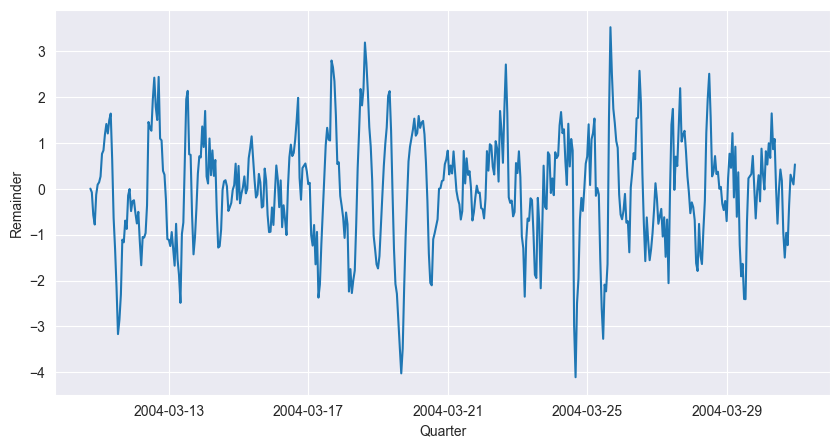

In [15]:
# Load data
AirQ = pd.read_csv('data/AirQualityUCI.csv',
                   parse_dates=True, decimal=",", sep=';')

# Combine Date and Time Columns:
AirQ["Time"] = AirQ["Time"].str.replace(".", ":")
AirQ["Date"] = pd.to_datetime(AirQ["Date"] + " " + AirQ["Time"], dayfirst=True)
dtindex = pd.DatetimeIndex(data=pd.to_datetime(AirQ["Date"]), freq='infer')

# Set as Index
AirQ.set_index(dtindex, inplace=True)
AirQ = AirQ.sort_index()
# Only keep temperature for given period
AirT = AirQ.loc["2004-3-10":"2004-3-30", "T"]
# AirT = pd.DataFrame(AirQ["T"])

# Decomposition on log-model using STL
decomp = STL(AirT, period=24 , seasonal=9)
decomp = decomp.fit()

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(decomp.resid)
plt.xlabel("Quarter")
plt.ylabel("Remainder")

plt.show()

The time series plot still exhibits some seasonality, such that stationarity of the underlying process seems unlikely. Different choices of **seasonal** in the **STL()** function will change the behaviour of the remainder sequence.

## Estimation of Correlation [^estimation-correlation]

We have introduced the most important measures for serial dependence in time series. However, these concepts are restricted to the theoretical models and hence make use of the probabilistic behaviour at each time instance. In practice, however, we are confronted with a *single realization* of the process, i.e. at each time instance only one value is available. From a viewpoint of classical statistics, this is a problem. The assumption of stationarity is crucial in this context: it paves the way to sound statistical estimators for mean, auto- and crosscovariance sequences.

Throughout this chapter we will assume that the time series ${x_1, x_2, \ldots, x_n}$ is a realization of a weakly stationary process ${X_1, X_2, \ldots, X_n}$.

[^estimation-correlation]: [@birbaumerPredictiveModelingLecture2025, p. 371]

### Estimation of the Autocovariance [^sample-autocovariance]

The theoretical autocovariance function of a stationary process is estimated by the sample autocovariance sequence which we define next.

:::{prf:definition} Sample Autocovariance

1. The *sample autocovariance* is defined by
$$
\hat{\gamma}(h) = \frac{1}{n} \sum_{i=1}^{n-h} (x_{i+h} - \bar{x})(x_i - \bar{x})
$$
with $\hat{\gamma}(-h) = \hat{\gamma}(h)$ for $h = 0, 1, \ldots, n-1$.

2. The *sample autocorrelation* is defined by
$$
\hat{\rho}(h) = \frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}.
$$
:::

Note that the sum runs over a restricted range of $n - h$ points but we nevertheless normalize by $n$ rather than $n - h$. Neither choice, however, results in an unbiased estimator.

#### Example 1 [^example-13.4.1]

We compute the estimators above for simulated data. First we simulate a realization of a moving average process.

[^sample-autocovariance]: [@birbaumerPredictiveModelingLecture2025, p. 372]
[^example-13.4.1]: [@birbaumerPredictiveModelingLecture2025, Example 13.4.1]

In [16]:
import numpy as np
import pandas as pd

np.random.seed(0)

# White noise signal
w = np.random.normal(size=1000, loc=2, scale=0.1)
w = pd.DataFrame(w)
# Filter with window = 3
w = w.rolling(window=3).mean()

In `Python`, the autocovariance and -correlation can be computed with the `acof()` and `acf()` (from `statsmodels.tsa.stattools`) respectively. During the application of the moving average (in the `rolling` command), missing values are created at the boundaries. To omit `NaN` entries, the setting `missing` is set to `drop`.

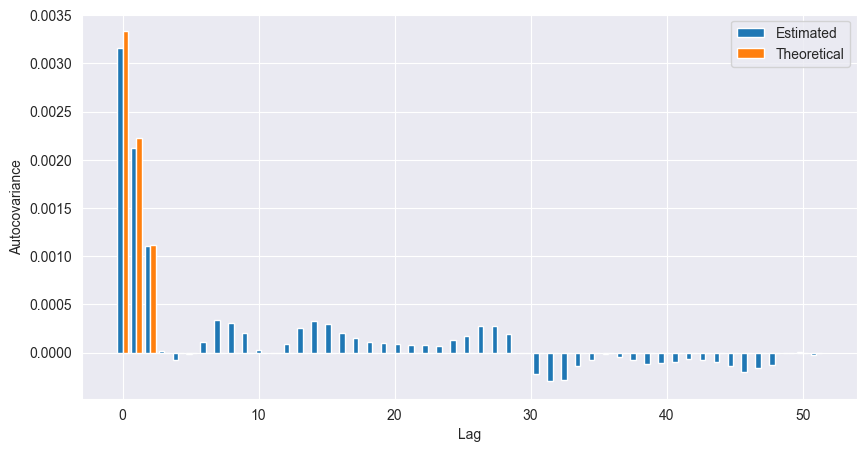

In [17]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acovf

# Autocovariance
ac = acovf(w, fft=False, missing='drop', nlag=50)

# Theoretical autocovariance
sigma = 0.1
act = np.zeros(len(ac))
act[0] = 3 / 9 * sigma**2
act[1] = 2 / 9 * sigma**2
act[2] = 1 / 9 * sigma**2


# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

width = 0.4
x = np.linspace(0, len(ac), len(ac))
ax.bar(x - width / 2, ac, width=width, label='Estimated')
ax.bar(x + width / 2, act, width=width, label='Theoretical')
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.legend()

plt.show()

The `nlag` parameter sets the maximal lag up to which the autocovariance should be computed. The figure shows the autocovariance of the moving average data. It can be seen that the lags $h=0,1,2$ produce a significant value and that for $h>2$ the autocovariance is very small. This is in accordance with the theoretical results. We add the values of the true autocovariance for comparison. Nevertheless, the sample autocovariance shows an oscillating pattern which we will comment on below.

#### Example 2: [^example-13.4.2]
We again consider the moving average process. The following command produces the correlogram.

[^example-13.4.2]: [@birbaumerPredictiveModelingLecture2025, Example 13.4.2]

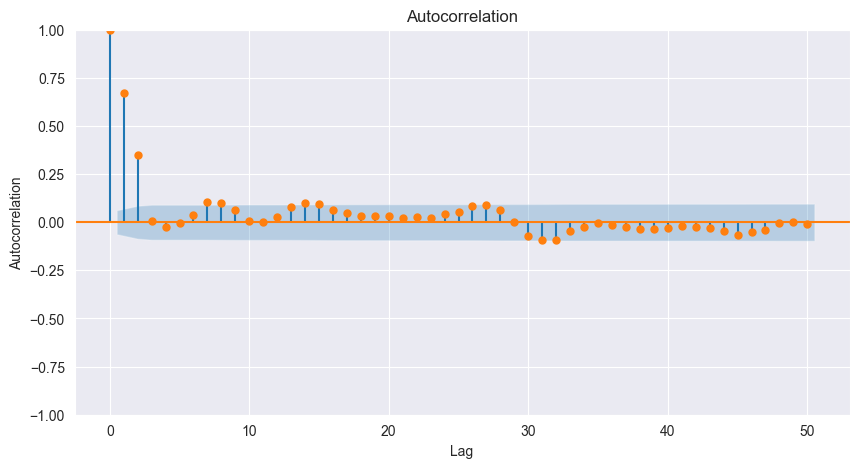

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plot_acf(w, missing='drop', lags=50, ax=ax, c='C1')
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

The two-sigma confidence bands are drawn automatically and we see that starting from the $3$rd all lags produce an autocorrelation which is in the band. In practice, once the estimated autocorrelation stays within these bands one sets it to 0 (A more formal way of testing is the _Ljung-Box test_ that tests the null-hypothesis that a number of autocorrelation coefficients is zero. The test is implemented in the `statsmodels.stats.diagnostic.acorr_ljungbox()`) 